# Quartiers politique de la ville

In [1]:
from dgfip.qpv import get_qpv
qpv = get_qpv()

In [3]:
qpv.head(3)

,CODE_QP,NOM_QP,COMMUNE_QP,geometry,distance Buralistes,intersect Buralistes,distance Centre de Finances publiques,intersect Centre de Finances publiques,distance France Services,intersect France Services,distance Permanences finances publiques,intersect Permanences finances publiques
0,QP044012,Le Ranzay,Nantes,"POLYGON ((357455.157 6692832.812, 357455.351 6...",0.324553,False,2.717901,False,4.500712,False,25.056348,False
1,QP033010,Grand-Parc,Bordeaux,"POLYGON ((416890.442 6423848.428, 416894.521 6...",0.000000,True,1.824637,False,3.251293,False,79.473430,False
2,QP066007,Bas-Vernet Nouveau QPV,Perpignan,"POLYGON ((691840.400 6178736.600, 691835.200 6...",0.005110,False,0.307418,False,1.026330,False,74.420676,False


In [2]:
# fond de carte des départements
import geopandas as gpd
dep = gpd.read_file('https://github.com/gregoiredavid/france-geojson/raw/master/departements-version-simplifiee.geojson', crs='4236')

Text(0.5, 1.0, 'Distance des quartiers politique de la ville \n au centre des finances publiques le plus proche')

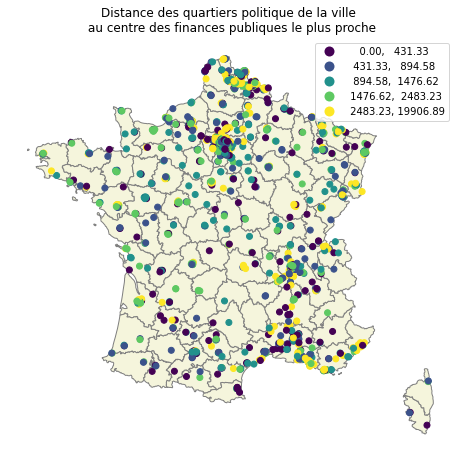

In [32]:
qpv_points = qpv.set_geometry(qpv.centroid)
ax = dep.to_crs('2154').plot(facecolor='beige', edgecolor='grey', figsize=(8,8))
qpv_points.plot(column = 'distance Centre de Finances publiques', scheme='Quantiles', legend=True, ax=ax)
ax.set_axis_off()
ax.set_title('Distance des quartiers politique de la ville \n au centre des finances publiques le plus proche')

In [19]:
long_qpv = pd.melt(qpv, value_vars=[col for col in qpv.columns if col.startswith('distance')], id_vars = 'CODE_QP', var_name='type', value_name='distance')

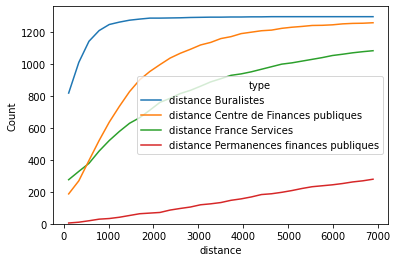

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.histplot(long_qpv[long_qpv['distance'].le(7000)], x='distance', hue='type', cumulative=True, stat='count', fill=False, element="poly", common_norm=False)